# 계층적 군집 (1) 
계층적 군집분석은 데이터와 데이터, 군집과 데이터, 군집과 군집간의 거리에 대한 유사도로 군집을 형성

## 동작하는 방식
두 점사이를 가까운 것끼리 합침

어떻게 두점 사이의 거리를 결정할 지에 대한 측정방식이 필요함

> 유클리디안 거리, 맨하탄 거리


## 군집간의 거리를 구하는 방법

### 1. Min(Single Link)
군집과 군집으 ㅣ거리를 구할 때 최소 거리인 것을 유사도로 측정
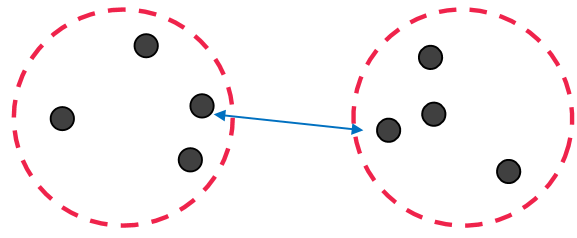
### 2. Max (Complete Link)

군집과 군집의 거리를 구할 때 가장 최대거리인것을 유사도로 측정하는 방식
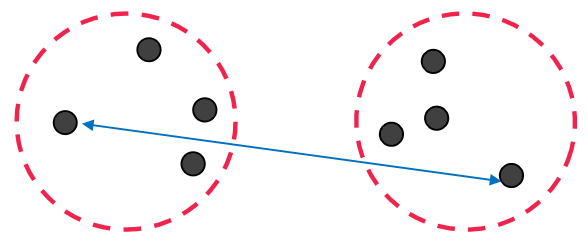
### 3. Average Link
군집과 군집의 거리를 구할 때 거리의 평균을 구해 유사도로 측정하는 방식
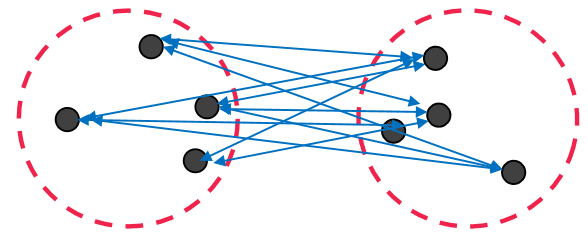
### 4. Centroids
군집과 군집의 거리를 구할 때 데이터의 중김점 거리를 유사도로 측정하는 방식
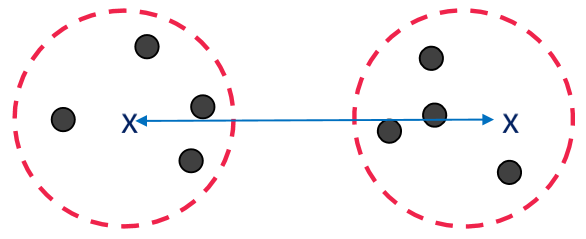
### 5. Ward's method 
두 개의 군집이 병합되었슬 때 증가하는 변동성의 양으로 유사도를 측정하는 방식

### 변동성
두 군집의 중앙값과 두 군집에 있는 모든 데이터와의 거리의 합에서 군집간에 형성되는 거리를 뺀값

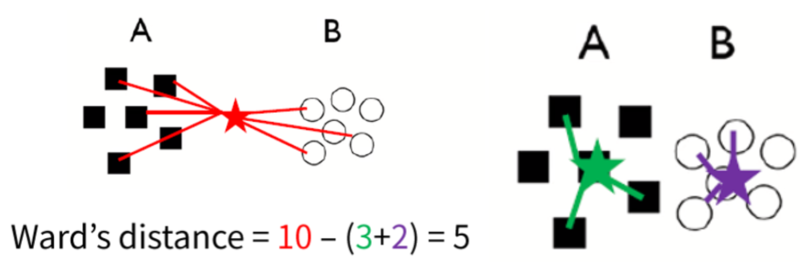


## #01. 패키지 참조


In [1]:

import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd 
from scipy.cluster.hierarchy import dendrogram,linkage

# linkage는 계층적 군집분석의 알고리즘 모듈
## linked = linkage(x,'single')을 통해 최소거리 측정법으로 유사도를 측정
## dendropgram(linked,orientation = 'top',labels=labelList,distance_sort='descending',show_leaf_count = True)



In [23]:
x = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


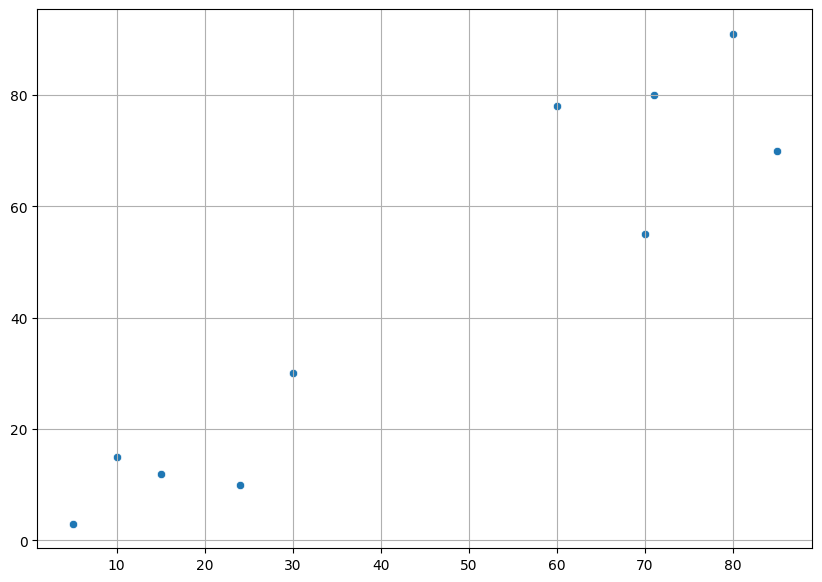

In [19]:
plt.figure(figsize=(10,7))
sb.scatterplot(x=x[:,0],y=x[:,1])
plt.grid()
plt.show()
plt.close()

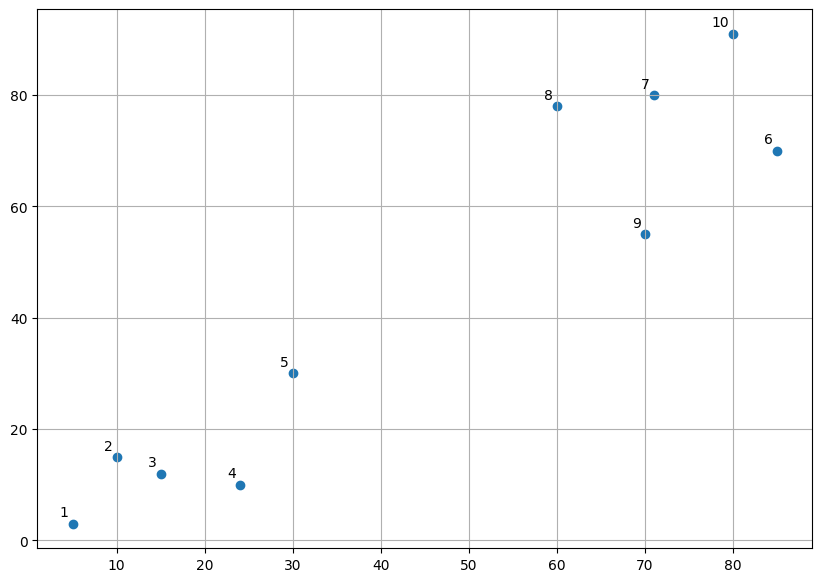

In [20]:
labels = range(1,11)
plt.figure(figsize=(10,7))
plt.scatter(x=x[:,0],y=x[:,1])

for label,x,y in zip(labels,x[:,0],x[:,1]):
    plt.annotate(label, xy=(x,y),xytext=(-3,3),textcoords='offset points',ha = 'right',va = 'bottom')
plt.grid()
plt.show()
plt.close()

## #03.

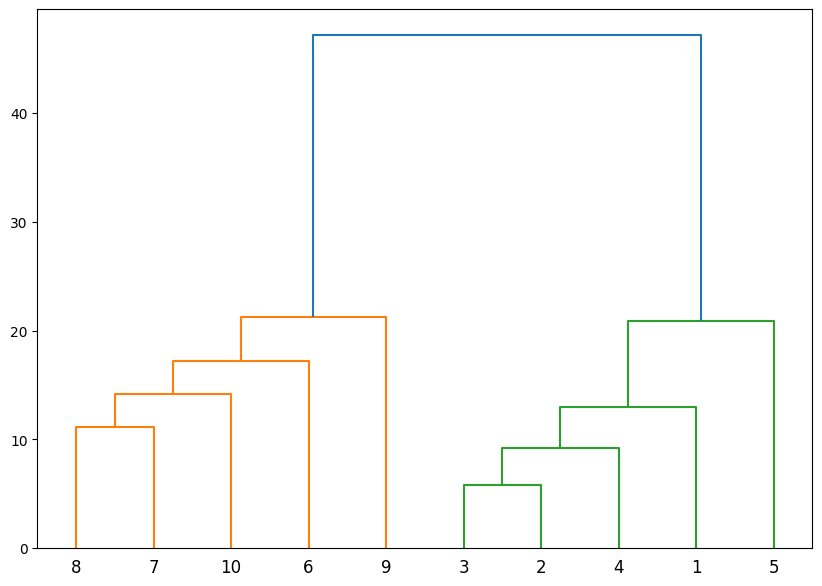

In [24]:
linked= linkage(x,'single')
labelList = range(1,11)
plt.figure(figsize=(10,7))
dendrogram(linked,orientation='top',
           labels=labelList,
        #    count_sort='ascending',
        # 각 노드 n에 대해 두 하위 링크가 표시되는 순서
        # False: 아무것도 안함(기본값)
        # 'ascending': 클러스터에 원본 개체수가 가장 적은 하위 객체가 먼저 출력
        # `descending`: 클러스터에 원본 개체수가 가장 많은 하위 객체가 먼저 출력
           distance_sort='descending', ## 거리에 따라 노드가 정렬된다.
        # 각 노드 n에 대해 두 하위 링크가 표시되는 순서
        # False: 아무것도 안함(기본값)
        # 'ascending': 직계 자손의 사이의 거리가 최소인 하위 항목이 먼저 표시됨
        # `descending`: 직계 자손의 사이의 거리가 최대인 하위 항목이 먼저 표시됨
        show_leaf_counts=True)

plt.show()


## #04. 병합군집



In [28]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(
    n_clusters=2,
    ## 클러스터간 거리를 측정하는 방법
    metric = 'euclidean',
    
    # ward 기본값, complete, average,single 
    linkage='single',
    ## 노드간의 거리 계산값을 저장할지 여부  (시각화를 위해서 꼭 필요함)
    compute_distances=True
)

clustering = ac.fit(x)
clustering

AgglomerativeClustering(compute_distances=True, linkage='single',
                        metric='euclidean')

### 2. 군집결과 확인


In [29]:
labels = clustering.labels_
labels

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

### 3. 노드 간 거리 확인

학습모델 객체 생성 단계에서 반드시 compute_distance = True, 가 설정되어야한다.

In [30]:
clustering.distances_

array([ 5.83095189,  9.21954446, 11.18033989, 13.        , 14.2126704 ,
       17.20465053, 20.88061302, 21.21320344, 47.16990566])

In [31]:
clustering.children_

array([[ 1,  2],
       [10,  3],
       [ 6,  7],
       [ 0, 11],
       [12,  9],
       [ 5, 14],
       [13,  4],
       [ 8, 15],
       [16, 17]])

In [ ]:
# a

# for i , merge in enumerate(clustering.children_) :
#     current_count = 0 
#     for child_idx
    
